# 로지스틱 회귀
* 주로 분류를 하기 위한 알고리즘
* 예0/아니오1 등의 이진분류에 많이 사용
* 의료,통신,데이터마이닝 분야의 회귀/분류를 위한 예측모델로 활용

# 머신러닝 교육자료 패키지
* 안드레아스 뮐러가 쓴 책의 그래프와 데이터셋을 
손쉽게 다루기 위한 패키지
  + => '파이썬 라이브러리를 활용한 머신러닝'
* pip install mglearn

In [1]:
pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 24.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 11.5 MB/s eta 0:00:0000:0100:01m
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=d763dd904efa2a12c4bfcc2de909084bc36d29b24ebf77b976c344d8fd10458e
  Stored in directory: /home/centos/.cache/pip/wheels/87/75/37/404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report

/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


0.9230769230769231


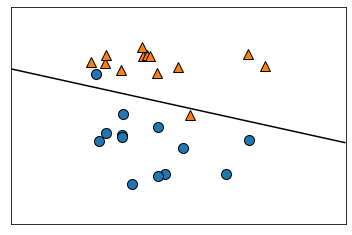

In [34]:
import mglearn

# 데이터셋 생성
X, y = mglearn.datasets.make_forge()

# 산점도(시각화)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

# 로지스틱 회귀
lr = LogisticRegression()
clf = lr.fit(X, y)
print(clf.score(X,y))

# 결정경계(시각화)
mglearn.plots.plot_2d_separator(clf, X)

plt.show()

# 선형회귀 함정

In [35]:
# 특정 곤충질량에 따라 암수구분하는 모델 생성
X = np.array([1.94,1.67,0.92,1.11,1.41,1.65,2.28,0.47,1.07,2.19,2.08,1.02,0.91,1.16,1.46,1.02,0.85,0.89,1.79,1.89,0.75,0.9,1.87,0.5,0.69,1.5,0.96,0.53,1.21,0.6])
y = np.array([1,1,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,1,1,0,0,1,1,0,1,0])


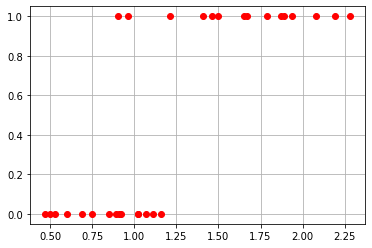

In [37]:
# 데이터 시각화1
plt.plot(X, y, 'ro')
plt.grid()
plt.show()

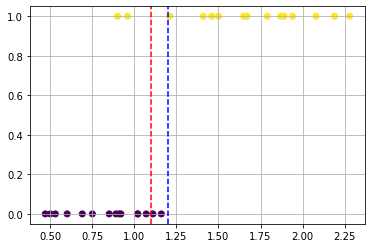

In [52]:
# 데이터 시각화2
plt.scatter(X, y, c=y)
plt.axvline(x=1.1, color='r', linestyle='--')
plt.axvline(x=1.2, color='b', linestyle='--')
plt.grid()

In [44]:
## 선형회귀분석
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X.reshape(-1,1), y.reshape(-1,1))

print(lr.coef_, lr.intercept_)  # 기울기, 절편

[[0.74825276]] [-0.43007818]


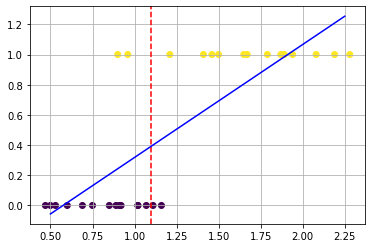

In [45]:
## 선형회귀분석 - 시각화

# 회귀방정식 : y = ax + b
x = np.linspace(0.5, 2.25, 50)  # 0.5 ~ 2.25 간격 = 50등분
yy = lr.coef_*x + lr.intercept_

plt.scatter(X, y, c=y)
plt.axvline(x=1.1, color='r', linestyle='--')
plt.plot(x.reshape(-1,1), yy.reshape(-1,1), 'b')
plt.grid()


* 위 그래프에서 보듯 선형방정식은 이항분포를 따르는 
데이터에 적용하기에 다소 무리가 있음
  + $y = ax + b$
* 즉, 우변값의 범위는 '-무한대 ~ +무한대'이지만
좌변값의 범위는 '0 ~ 1'임
* 따라서, 좌변값의 범위를 우변과 동일하게 하려면
적절한 변환함수가 필요 = > logit함수를 이용

$$ f(x) = {{1} \over {1 + e ^{-x}}}  $$

# 로지스트 함수 정의

In [46]:
def logistic(x, a, b):
    yy = 1/(1+ np.exp(-(a*x+b)))
    return yy

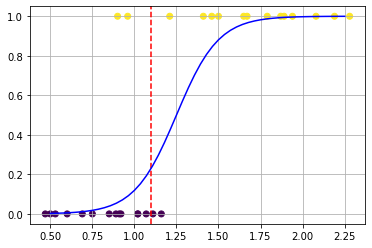

In [50]:
# 로지스트 함수 그래프
x = np.linspace(0.5, 2.25, 50)  # 0.5 ~ 2.25 간격 = 50등분
yy = logistic(x, 8, -10)  # 회귀계수

plt.scatter(X, y, c=y)
plt.axvline(x=1.1, color='r', linestyle='--')
plt.plot(x.reshape(-1,1), yy.reshape(-1,1), 'b')
plt.grid()